In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Spectrum Analysis: Weak (Linear) Landau Damping 

In [4]:
# number of Hermite moments
Nv = 4

In [5]:
def A_advection(Nv, k):
    # advection matrix with off-diagonal entries
    # intialize off-diagonal vector
    vec = np.zeros(Nv-1, dtype="complex128")
    for jj in range(1, Nv):
        vec[jj-1] = np.sqrt(jj)
    # set up tri-diagonal matrix
    A = np.diag(vec, 1) + np.diag(vec, -1) 
    # wave-particle interaction term
    A[1, 0] += 1 / k**2 
    return A

def damping_rate(mat):
    # return least damped mode (gamma) s.t. lambda = gamma + i * omega
    # eigenvalue decomposition
    eig, _= np.linalg.eig(mat)
    # return the least damped mode rate
    return np.max(eig.real)
    
def LenardBernstein_eig(k, nu, Nv):
    # Lenard-Bernstein operator 
    A = A_advection(Nv=Nv, k=k) + np.diag(np.arange(Nv)*nu/(1j*k), 0)
    return damping_rate(mat=-1j * k * A)

def ConservativeLenardBernstein_eig(k, nu, Nv):
    # Lenard-Bernstein operator 
    main_diag = np.arange(Nv)-2
    main_diag[0] = 0 
    main_diag[1] = 0 
    main_diag[2] = 0 
    A = A_advection(Nv=Nv, k=k) + np.diag(main_diag*nu/(1j*k), 0)
    return damping_rate(mat=-1j * k * A)
    
def Hypercollisions_eig(k, nu, Nv):
    # Hypercollisional operator 
    # C(C_{Nv-1}) = nu * C_{Nv-1}
    A = A_advection(Nv=Nv, k=k)
    # advection matrix (main-diagonal)
    vec2 = np.zeros(Nv)
    for jj in range(0, Nv):
        # hyper collisions coefficient
        vec2[jj] = nu*((jj)*(jj-1)*(jj-2))/((Nv-1)*(Nv-2)*(Nv-3)) 
    A =  A + np.diag(vec2 / 1j / k , 0)
    return damping_rate(mat=-1j * k * A)

def HammetPerkins_eig(k, nu, Nv):
    # Hammet Perkins esque (like) operator 
    # C(C_{Nv-1}) = i * nu * k/|k| * C_{Nv-1}
    A = A_advection(Nv=Nv, k=k)
    A[-1, -1] = - nu * 1j * np.sqrt(Nv) * k / np.abs(k) 
    return damping_rate(mat=-1j * k * A)

In [6]:
A = A_advection(Nv=Nv, k=1) + np.diag(np.arange(Nv)*2/(1j), 0)
np.max(np.linalg.eig(-1j * A)[0].real)

-1.4155246268080555

1.0101010101010102
0.5840842714575543


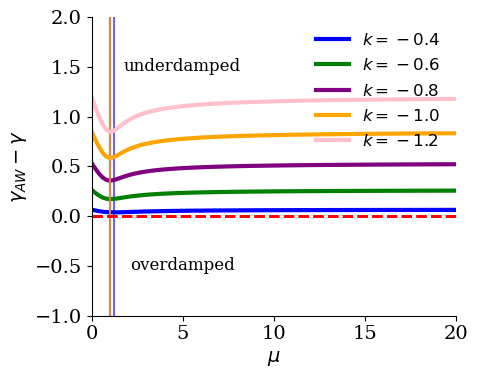

In [7]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 4))

nu_LC = np.linspace(0, 20, 100)
eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=-0.4, nu=nu, Nv=Nv) 
ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 0.06612))], color="blue", alpha=0.6)
ax.plot(nu_LC, eig_LC + 0.06612, color="blue", label="$k=-0.4$", linewidth=3)

eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=-0.6, nu=nu, Nv=Nv)
ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 0.2641))], color="green", alpha=0.6)
ax.plot(nu_LC, eig_LC + 0.2641, color="green", label="$k=-0.6$", linewidth=3)

eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=-0.8, nu=nu, Nv=Nv) 
ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 0.5345))], color="purple", alpha=0.6)
ax.plot(nu_LC, eig_LC + 0.5345, color="purple", label="$k=-0.8$", linewidth=3)

eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=-1, nu=nu, Nv=Nv) 
ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 0.8513))], color="orange", alpha=0.6)
print(nu_LC[np.argmin(np.abs(eig_LC + 0.8513))])
print(np.min(np.abs(eig_LC + 0.8513)))
ax.plot(nu_LC, eig_LC + 0.8513, color="orange", label=r"$k=-1.0$", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=-1.2, nu=nu, Nv=Nv) 
ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 1.2018))], color="pink", alpha=0.2)
ax.plot(nu_LC, eig_LC + 1.2018, color="pink", label=r"$k=-1.2$", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)


ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\gamma_{AW} - \gamma$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-1, 2)
ax.set_xlim(0, np.max(nu_LC))
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
ax.text(np.mean(nu_LC)/2, 1.5, 'underdamped', fontsize=12, ha='center', va='center')
ax.text(np.mean(nu_LC)/2, -0.5, 'overdamped', fontsize=12, ha='center', va='center')
plt.tight_layout()

plt.savefig("figs/spectra/optimal_HammetPerkins_nu_negative_k_Nv_" + str(Nv) + ".png", dpi=200)

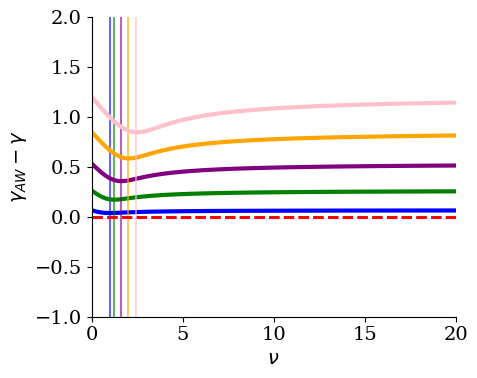

In [8]:
nu_HP = np.linspace(0, 20, 100)

fig, ax = plt.subplots(ncols=1, figsize=(5, 4))

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=-0.4, nu=nu, Nv=Nv) 
ax.axvline(nu_HP[np.argmin(np.abs(eig_LB + 0.06612))], color="blue", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.06612, color="blue", label="$k=-0.4$", linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=-0.6, nu=nu, Nv=Nv) 
ax.axvline(nu_HP[np.argmin(np.abs(eig_LB + 0.2641))], color="green", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.2641, color="green", label="$k=-0.6$", linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=-0.8, nu=nu, Nv=Nv) 
ax.axvline(nu_HP[np.argmin(np.abs(eig_LB + 0.5345))], color="purple", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.5345, color="purple", label="$k=-0.8$", linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=-1, nu=nu, Nv=Nv) 
ax.axvline(nu_HP[np.argmin(np.abs(eig_LB + 0.8513))], color="orange", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.8513, color="orange", label=r"$k=-1.0$", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=1.2, nu=nu, Nv=Nv) 
ax.axvline(nu_HP[np.argmin(np.abs(eig_LB + 1.2018))], color="pink", alpha=0.6)
ax.plot(nu_HP, eig_LB + 1.2018, color="pink", label=r"$k=1.2$", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

ax.set_xlabel(r"$\nu$")
#ax.set_xscale("log")
ax.set_ylabel(r"$\gamma_{AW} - \gamma $")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-1, 2)
ax.set_xlim(np.min(nu_HP), np.max(nu_HP))
# legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
# legend.get_frame().set_alpha(0)
# ax.text(np.mean(nu_HP)/2, 1.5, 'underdamped', fontsize=12, ha='center', va='center')
# ax.text(np.mean(nu_HP)/2, -0.5, 'overdamped', fontsize=12, ha='center', va='center')

plt.tight_layout()

plt.savefig("figs/spectra/optimal_Hypercollisions_nu_negative_k_Nv_" + str(Nv) + ".png", dpi=200)

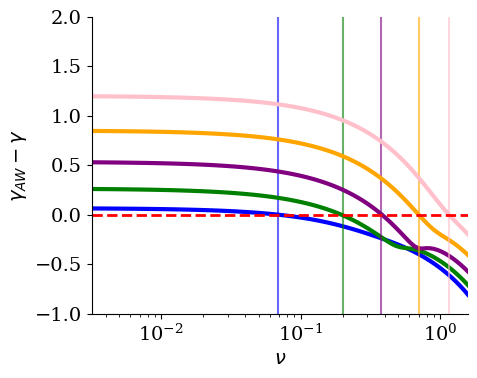

In [9]:
nu_LB = 10**np.linspace(0.2, -2.5, 100)

fig, ax = plt.subplots(ncols=1, figsize=(5, 4))

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=-0.4, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.argmin(np.abs(eig_LB + 0.06612))], color="blue", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.06612, color="blue", label="$k=-0.4$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=-0.6, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.argmin(np.abs(eig_LB + 0.2641))], color="green", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.2641, color="green", label="$k=-0.6$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=-0.8, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.argmin(np.abs(eig_LB + 0.5345))], color="purple", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.5345, color="purple", label="$k=-0.8$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=-1, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.argmin(np.abs(eig_LB + 0.8513))], color="orange", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.8513, color="orange", label="$k=-1.0$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=-1.2, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.argmin(np.abs(eig_LB + 1.2018))], color="pink", alpha=0.6)
ax.plot(nu_LB, eig_LB + 1.2018, color="pink", label="$k=-1.2$", linewidth=3)


ax.axhline(0, ls="--", color="red", linewidth=2)
ax.set_xlabel(r"$\nu$")
ax.set_xscale("log")
ax.set_ylabel(r"$\gamma_{AW} - \gamma$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-1, 2)
# legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
# legend.get_frame().set_alpha(0)
ax.set_xlim(np.min(nu_LB), np.max(nu_LB))
# ax.text(1e-1*np.mean(nu_LB), 1.5, 'underdamped', fontsize=12, ha='center', va='center')
# ax.text(1e-1*np.mean(nu_LB), -0.5, 'overdamped', fontsize=12, ha='center', va='center')

plt.tight_layout()
plt.savefig("figs/spectra/optimal_LenardBernstein_nu_negative_k_Nv_" + str(Nv) + ".png", dpi=200)

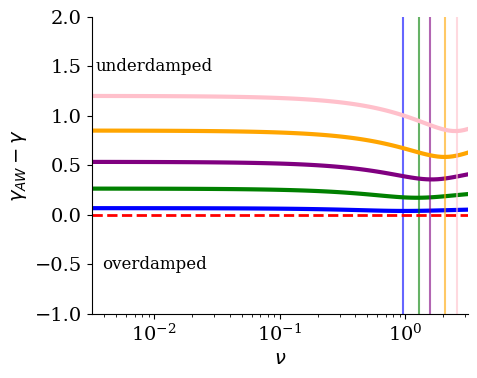

In [10]:
nu_LB = 10**np.linspace(0.5, -2.5, 100)

fig, ax = plt.subplots(ncols=1, figsize=(5, 4))

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = ConservativeLenardBernstein_eig(k=-0.4, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.argmin(np.abs(eig_LB + 0.06612))], color="blue", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.06612, color="blue", label="$k=-0.4$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = ConservativeLenardBernstein_eig(k=-0.6, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.argmin(np.abs(eig_LB + 0.2641))], color="green", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.2641, color="green", label="$k=-0.6$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = ConservativeLenardBernstein_eig(k=-0.8, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.argmin(np.abs(eig_LB + 0.5345))], color="purple", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.5345, color="purple", label="$k=-0.8$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = ConservativeLenardBernstein_eig(k=-1, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.argmin(np.abs(eig_LB + 0.8513))], color="orange", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.8513, color="orange", label="$k=-1.0$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = ConservativeLenardBernstein_eig(k=1.2, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.argmin(np.abs(eig_LB + 1.2018))], color="pink", alpha=0.6)
ax.plot(nu_LB, eig_LB + 1.2018, color="pink", label="$k=1.2$", linewidth=3)


ax.axhline(0, ls="--", color="red", linewidth=2)
ax.set_xlabel(r"$\nu$")
ax.set_xscale("log")
ax.set_ylabel(r"$\gamma_{AW} - \gamma$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-1, 2)
#legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
#legend.get_frame().set_alpha(0)
ax.set_xlim(np.min(nu_LB), np.max(nu_LB))
ax.text(0.01, 1.5, 'underdamped', fontsize=12, ha='center', va='center')
ax.text(0.01, -0.5, 'overdamped', fontsize=12, ha='center', va='center')

plt.tight_layout()
plt.savefig("figs/spectra/optimal_ConservativeLenardBernstein_nu_negative_k_Nv_" + str(Nv) + ".png", dpi=200)